In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install "numpy<2"


^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/sarva/Downloads/train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 3.1 Part 1: Data Manipulation and Analysis

1. Convert date column to pandas datetime format

In [4]:
print(f"Data Types of columns before conversion:\n\n{df.dtypes}\n")
df['datetime'] = pd.to_datetime(df['datetime'])
print(f"Data Types of columns after conversion:\n\n{df.dtypes}\n")

Data Types of columns before conversion:

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Data Types of columns after conversion:

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object



2. Check data types and missing values

In [5]:
df.info()  # Check data types and missing values
print(f"Number of rows: {len(df)}")
print(f"Missing values:\n{df.isnull().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
Number of rows: 10886
Missing values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp        

3. Create new columns for year, month, day of the week, and hour


In [6]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour


4. Rename season values to spring, summer, fall, and winter

In [7]:
df['season'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['season']

0        spring
1        spring
2        spring
3        spring
4        spring
          ...  
10881    winter
10882    winter
10883    winter
10884    winter
10885    winter
Name: season, Length: 10886, dtype: object

5. Calculate total rentals for casual and registered users in 2011 and 2012

In [8]:
# Group the data by year and calculate the total number of casual and registered rentals
total_rentals_by_year = df.groupby('year')[['casual', 'registered']].sum()

# Display the total number of casual and registered rentals for each year
print("Total number of casual and registered bikes rented in 2011 and 2012:")
print(total_rentals_by_year)

# Extract and print totals for 2011 and 2012 separately
print(f"\nIn 2011: Casual = {total_rentals_by_year.loc[2011, 'casual']}, Registered = {total_rentals_by_year.loc[2011, 'registered']}")
print(f"In 2012: Casual = {total_rentals_by_year.loc[2012, 'casual']}, Registered = {total_rentals_by_year.loc[2012, 'registered']}")


Total number of casual and registered bikes rented in 2011 and 2012:
      casual  registered
year                    
2011  155817      626162
2012  236318     1067179

In 2011: Casual = 155817, Registered = 626162
In 2012: Casual = 236318, Registered = 1067179


6. Mean of hourly rentals count by season

In [9]:
# Group the data by season and calculate the mean of the total rentals count
mean_rentals_by_season = df.groupby('season')['count'].mean()

# Display the mean rental count for each season
print("Mean hourly rentals by season:")
print(mean_rentals_by_season)

# Identify the season with the highest mean rental count
highest_mean_season = mean_rentals_by_season.idxmax()
print(f"\nThe season with the highest mean hourly rentals is: {highest_mean_season} ({mean_rentals_by_season[highest_mean_season]:.2f} rentals)")



Mean hourly rentals by season:
season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

The season with the highest mean hourly rentals is: fall (234.42 rentals)


7. Registered vs non-registered rentals on working and non-working days

In [10]:
# Group the data by working day and user type, summing up the total rentals
rentals_by_workingday = df.groupby(['workingday', 'year'])[['casual', 'registered']].sum()

# Display the total rentals for working and non-working days for both years
print("Total rentals by registered and casual users on working and non-working days for 2011 and 2012:")
print(rentals_by_workingday)

# Analyze registered users
registered_workingday_2011 = rentals_by_workingday.loc[(1, 2011), 'registered']
registered_nonworkingday_2011 = rentals_by_workingday.loc[(0, 2011), 'registered']
registered_workingday_2012 = rentals_by_workingday.loc[(1, 2012), 'registered']
registered_nonworkingday_2012 = rentals_by_workingday.loc[(0, 2012), 'registered']

print(f"\nRegistered Users:")
print(f"2011 - Working Day: {registered_workingday_2011}, Non-Working Day: {registered_nonworkingday_2011}")
print(f"2012 - Working Day: {registered_workingday_2012}, Non-Working Day: {registered_nonworkingday_2012}")

# Analyze casual users
casual_workingday_2011 = rentals_by_workingday.loc[(1, 2011), 'casual']
casual_nonworkingday_2011 = rentals_by_workingday.loc[(0, 2011), 'casual']
casual_workingday_2012 = rentals_by_workingday.loc[(1, 2012), 'casual']
casual_nonworkingday_2012 = rentals_by_workingday.loc[(0, 2012), 'casual']

print(f"\nCasual Users:")
print(f"2011 - Working Day: {casual_workingday_2011}, Non-Working Day: {casual_nonworkingday_2011}")
print(f"2012 - Working Day: {casual_workingday_2012}, Non-Working Day: {casual_nonworkingday_2012}")

# Observations
if registered_workingday_2011 > registered_nonworkingday_2011 and registered_workingday_2012 > registered_nonworkingday_2012:
    print("\nMore bikes are rented by registered users on working days in both 2011 and 2012.")
else:
    print("\nMore bikes are rented by registered users on non-working days.")

if casual_workingday_2011 > casual_nonworkingday_2011 or casual_workingday_2012 > casual_nonworkingday_2012:
    print("For casual users, more bikes are rented on non-working days.")
else:
    print("For casual users, more bikes are rented on working days.")


Total rentals by registered and casual users on working and non-working days for 2011 and 2012:
                 casual  registered
workingday year                    
0          2011   83099      167492
           2012  122938      281343
1          2011   72718      458670
           2012  113380      785836

Registered Users:
2011 - Working Day: 458670, Non-Working Day: 167492
2012 - Working Day: 785836, Non-Working Day: 281343

Casual Users:
2011 - Working Day: 72718, Non-Working Day: 83099
2012 - Working Day: 113380, Non-Working Day: 122938

More bikes are rented by registered users on working days in both 2011 and 2012.
For casual users, more bikes are rented on working days.


8. Months with highest and lowest total rentals in 2011 and 2012

In [11]:
# Filter the data for 2011 and 2012 separately
rentals_2011 = df[df['year'] == 2011].groupby('month')['count'].sum()
rentals_2012 = df[df['year'] == 2012].groupby('month')['count'].sum()

# Identify the months with the highest and lowest rentals for 2011
highest_month_2011 = rentals_2011.idxmax()
lowest_month_2011 = rentals_2011.idxmin()
print("2011 Bike Rentals:")
print(f"Highest rentals in month {highest_month_2011} with {rentals_2011[highest_month_2011]} rentals.")
print(f"Lowest rentals in month {lowest_month_2011} with {rentals_2011[lowest_month_2011]} rentals.\n")

# Identify the months with the highest and lowest rentals for 2012
highest_month_2012 = rentals_2012.idxmax()
lowest_month_2012 = rentals_2012.idxmin()
print("2012 Bike Rentals:")
print(f"Highest rentals in month {highest_month_2012} with {rentals_2012[highest_month_2012]} rentals.")
print(f"Lowest rentals in month {lowest_month_2012} with {rentals_2012[lowest_month_2012]} rentals.")


2011 Bike Rentals:
Highest rentals in month 7 with 92848 rentals.
Lowest rentals in month 1 with 23552 rentals.

2012 Bike Rentals:
Highest rentals in month 9 with 133425 rentals.
Lowest rentals in month 1 with 56332 rentals.


9. Weather type with highest and lowest mean hourly rentals

In [12]:
# Group the data by weather type and calculate the mean of the total rentals count
mean_rentals_by_weather = df.groupby('weather')['count'].mean()

# Identify the weather type with the highest and lowest mean rentals
highest_weather = mean_rentals_by_weather.idxmax()
lowest_weather = mean_rentals_by_weather.idxmin()

# Display the results
print("Mean hourly rentals by weather type:")
print(mean_rentals_by_weather)

print(f"\nThe weather type with the highest mean rentals is: {highest_weather} with {mean_rentals_by_weather[highest_weather]:.2f} rentals per hour.")
print(f"The weather type with the lowest mean rentals is: {lowest_weather} with {mean_rentals_by_weather[lowest_weather]:.2f} rentals per hour.")


Mean hourly rentals by weather type:
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

The weather type with the highest mean rentals is: 1 with 205.24 rentals per hour.
The weather type with the lowest mean rentals is: 3 with 118.85 rentals per hour.


10. Correlation of total rentals with numerical columns

In [13]:
# Filter only numerical columns from the dataset
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation of all numerical columns with the 'count' column
correlation_with_count = numeric_df.corr()['count']

# Sort correlations in descending order
sorted_correlation = correlation_with_count.sort_values(ascending=False)

# Identify the column with the highest correlation
highest_correlation_column = sorted_correlation.index[1]  # [1] skips 'count' itself
highest_correlation_value = sorted_correlation.iloc[1]

# Display the results
print("Correlation of numerical columns with total rentals (count):")
print(sorted_correlation)

print(f"\nThe column with the highest correlation to total rentals is: '{highest_correlation_column}' with a correlation value of {highest_correlation_value:.2f}.")


Correlation of numerical columns with total rentals (count):
count          1.000000
registered     0.970948
casual         0.690414
hour           0.400601
temp           0.394454
atemp          0.389784
year           0.260403
month          0.166862
windspeed      0.101369
workingday     0.011594
day_of_week   -0.002283
holiday       -0.005393
weather       -0.128655
humidity      -0.317371
Name: count, dtype: float64

The column with the highest correlation to total rentals is: 'registered' with a correlation value of 0.97.


11. Create a new categorical column 'day_period'

In [14]:
def get_day_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'
df['day_period'] = df['hour'].apply(get_day_period)

# Display rows to confirm
print(df[['hour', 'day_period']])



       hour day_period
0         0      night
1         1      night
2         2      night
3         3      night
4         4      night
...     ...        ...
10881    19    evening
10882    20    evening
10883    21    evening
10884    22    evening
10885    23    evening

[10886 rows x 2 columns]


12. Generate a pivot table for mean hourly total rentals count

In [15]:
pivot_table = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')
print(pivot_table)


workingday           0           1
day_period                        
afternoon   371.022989  266.196141
evening     180.182759  251.054662
morning     157.772414  234.353763
night        44.052083   16.217582


# 3.2 Part II: Data Visualisation

<!-- 3.2 Part II: Data Visualisation -->

1. Plot the distributions of all numerical columns using histograms

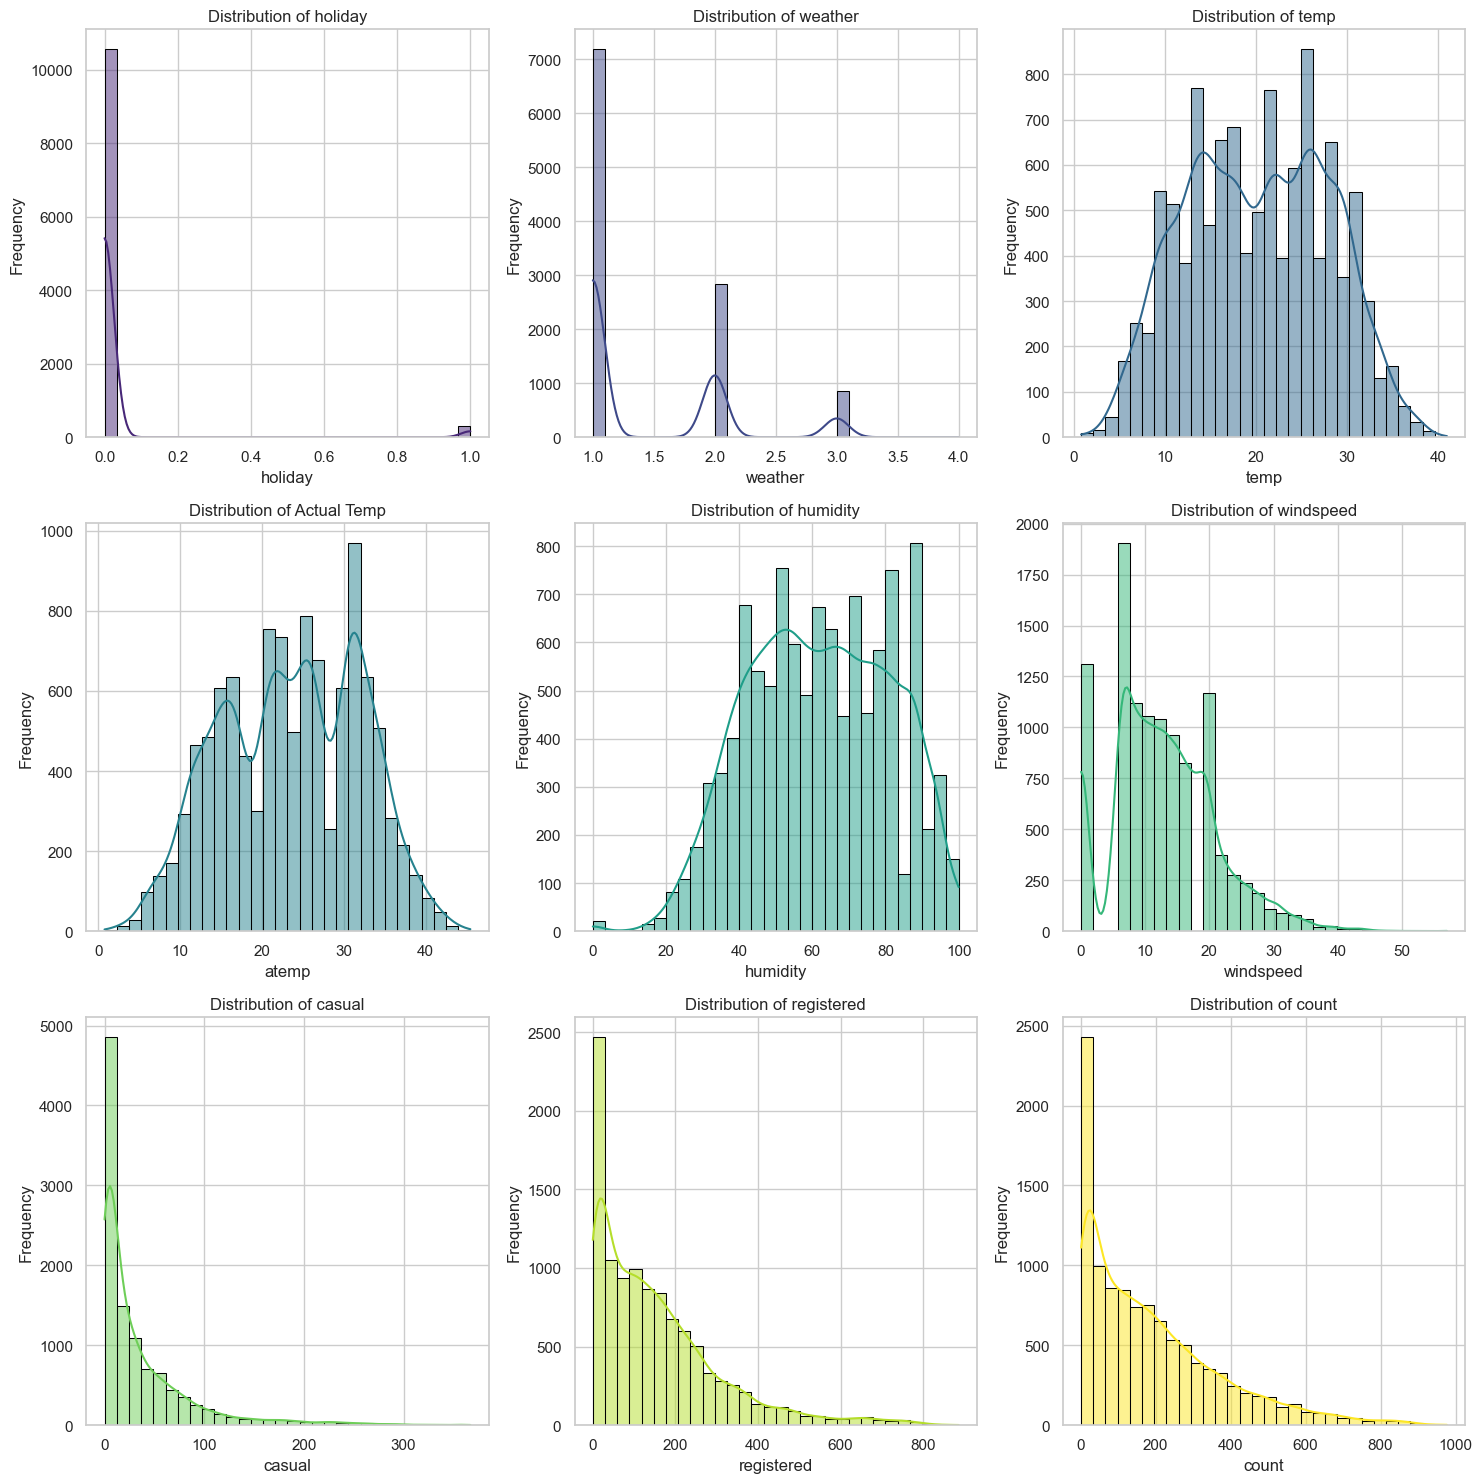

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set a colorful style for plots
sns.set(style="whitegrid")

# Select only numerical columns (excluding 'workingday')
numeric_columns = df.select_dtypes(include='number').columns

# Remove 'year', 'month', 'day_of_week', 'hour', and 'workingday' from the list of numerical columns
numeric_columns = [col for col in numeric_columns if col not in ['year', 'month', 'day_of_week', 'hour', 'workingday']]

# Set up the grid layout for subplots (3 graphs per row)
num_columns = len(numeric_columns)
grid_size = math.ceil(num_columns / 3)  # Create rows for 3 columns

# Set up the plot size (increased size for better visibility)
plt.figure(figsize=(15, grid_size * 5))

# Loop through each numerical column and plot a histogram
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(grid_size, 3, i)  # Create a subplot in a 3-column grid
    
    # Use a Seaborn color palette to make the bars more colorful
    column_title = 'Actual Temp' if column == 'atemp' else column  # Rename 'atemp' to 'Actual Temp' in the title
    sns.histplot(df[column], bins=30, kde=True, color=sns.color_palette("viridis", as_cmap=True)(i / num_columns), edgecolor='black')  # Plot histogram with KDE
    
    plt.title(f'Distribution of {column_title}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


2. Plot the distributions of all numerical columns using box plots

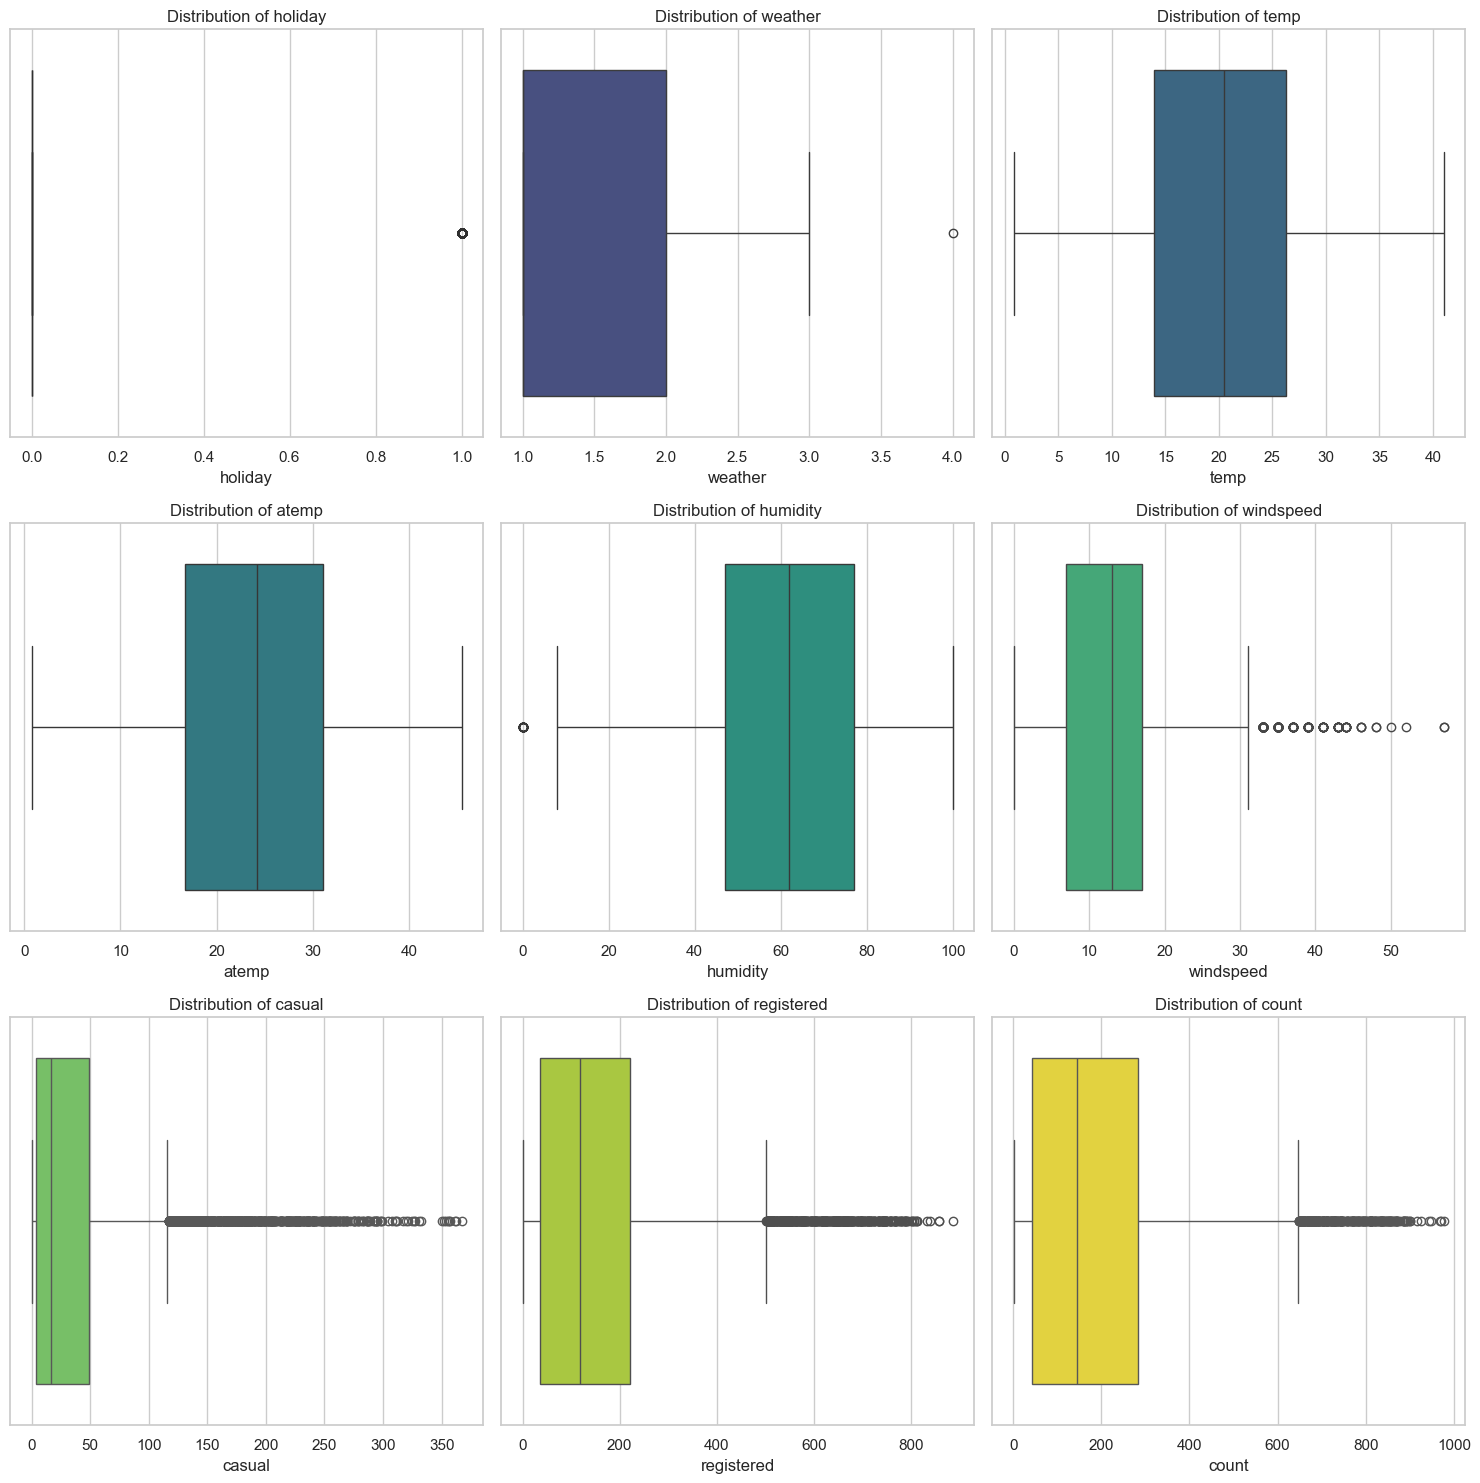

In [19]:


# Set a colorful style for plots
sns.set(style="whitegrid")

# Select only numerical columns (excluding 'workingday')
numeric_columns = df.select_dtypes(include='number').columns

# Remove 'year', 'month', 'day_of_week', 'hour', and 'workingday' from the list of numerical columns
numeric_columns = [col for col in numeric_columns if col not in ['year', 'month', 'day_of_week', 'hour', 'workingday']]

# Set up the grid layout for subplots (3 graphs per row)
num_columns = len(numeric_columns)
grid_size = math.ceil(num_columns / 3)  # Create rows for 3 columns

# Set up the plot size (increased size for better visibility)
plt.figure(figsize=(15, grid_size * 5))

# Loop through each numerical column and plot a box plot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(grid_size, 3, i)  # Create a subplot in a 3-column grid
    
    # Use Seaborn's boxplot with a vibrant color palette
    sns.boxplot(x=df[column], color=sns.color_palette("viridis", as_cmap=True)(i / num_columns))
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


3. Plot the mean of hourly total rentals count for working and non-working days

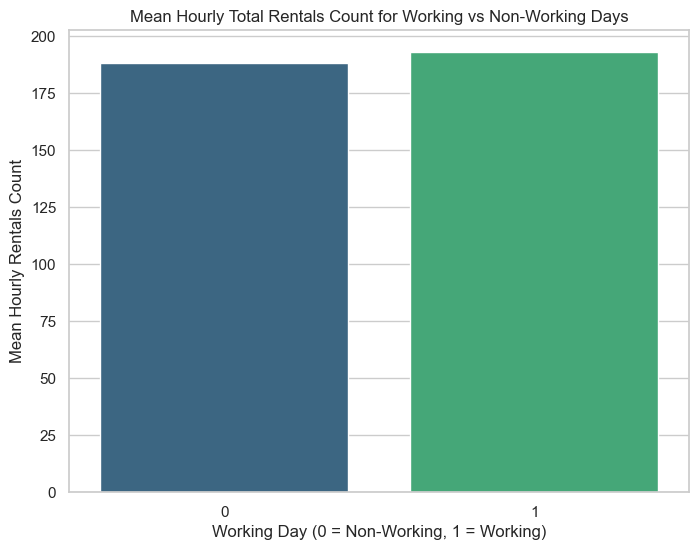

In [20]:


# Set a colorful style for plots
sns.set(style="whitegrid")

# Group by 'workingday' and calculate the mean of total rentals 'count'
mean_rentals_by_day_type = df.groupby('workingday')['count'].mean()

# Set up the plot size
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn to display the mean rentals for working vs non-working days
sns.barplot(x=mean_rentals_by_day_type.index, y=mean_rentals_by_day_type.values, palette="viridis")

# Customize the plot
plt.title('Mean Hourly Total Rentals Count for Working vs Non-Working Days')
plt.xlabel('Working Day (0 = Non-Working, 1 = Working)')  # Corrected 'xlab' to 'xlabel'
plt.ylabel('Mean Hourly Rentals Count')

# Display the plot
plt.show()


4. Mean hourly total rentals count by month for both years combined

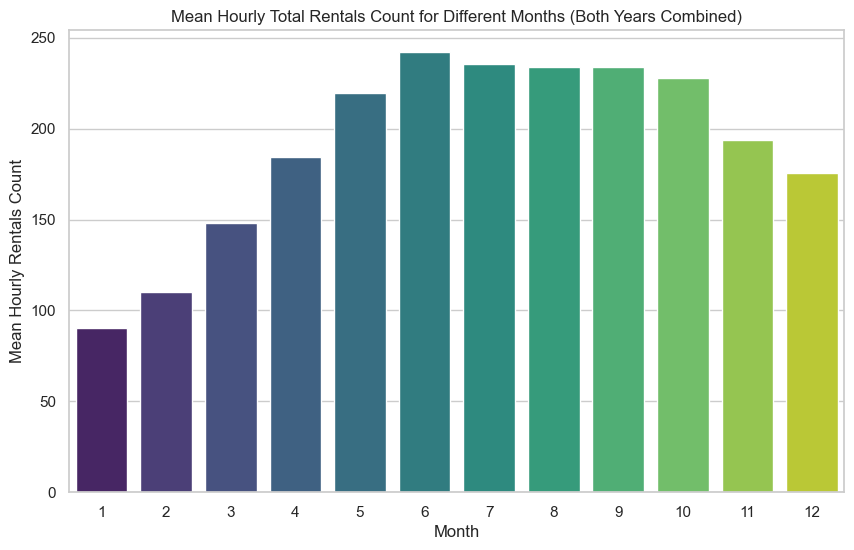

In [21]:


# Set a colorful style for plots
sns.set(style="whitegrid")

# Group by 'month' and calculate the mean of total rentals 'count'
mean_rentals_by_month = df.groupby('month')['count'].mean()

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn to display the mean rentals for each month
sns.barplot(x=mean_rentals_by_month.index, y=mean_rentals_by_month.values, palette="viridis")

# Customize the plot
plt.title('Mean Hourly Total Rentals Count for Different Months (Both Years Combined)')
plt.xlabel('Month')
plt.ylabel('Mean Hourly Rentals Count')

# Display the plot
plt.show()


5. Mean hourly total rentals count by month for each year in a multi-panel figure


<Figure size 1500x600 with 0 Axes>

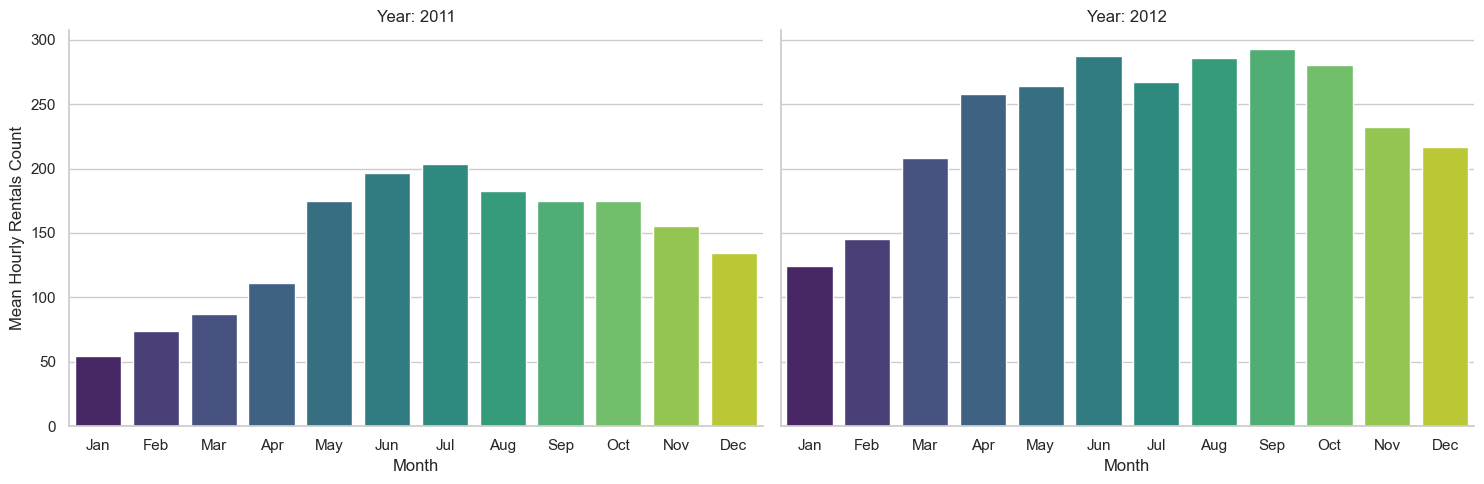

In [22]:


# Set a colorful style for plots
sns.set(style="whitegrid")

# Group by 'year' and 'month', then calculate the mean of total rentals 'count'
mean_rentals_by_month_year = df.groupby(['year', 'month'])['count'].mean().reset_index()

# Set up the plot size
plt.figure(figsize=(15, 6))

# Create a facet grid with 2 columns, one for each year
g = sns.FacetGrid(mean_rentals_by_month_year, col='year', height=5, aspect=1.5)

# Map the bar plot for each year to the facet grid
g.map(sns.barplot, 'month', 'count', palette='viridis')

# Customize the titles and labels
g.set_axis_labels('Month', 'Mean Hourly Rentals Count')
g.set_titles('Year: {col_name}')
g.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()


6. Mean and 95% CI of total rentals by weather categories

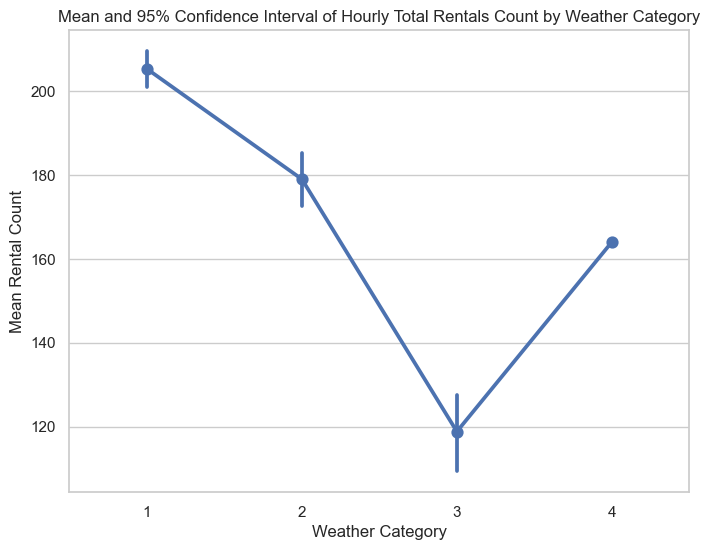

In [23]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='weather', y='count', data=df, ci=95)
plt.title('Mean and 95% Confidence Interval of Hourly Total Rentals Count by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Mean Rental Count')
plt.show()


7. Mean hourly rentals count versus the hour of the day

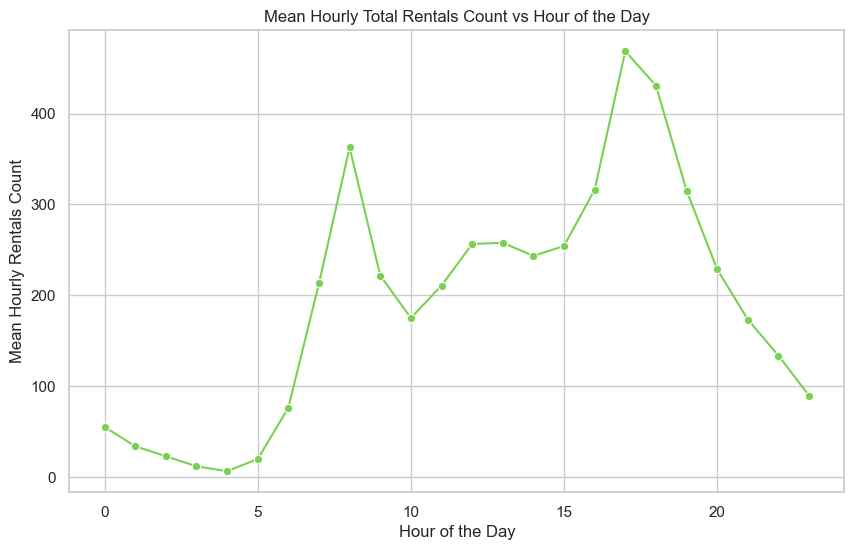

In [24]:

# Set a colorful style for plots
sns.set(style="whitegrid")

# Group by 'hour' and calculate the mean of total rentals 'count'
mean_rentals_by_hour = df.groupby('hour')['count'].mean()

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the line plot for mean hourly rentals vs. hour of the day
sns.lineplot(x=mean_rentals_by_hour.index, y=mean_rentals_by_hour.values, marker='o', color=sns.color_palette("viridis", as_cmap=True)(0.8))  # Using a specific color from viridis

# Customize the plot
plt.title('Mean Hourly Total Rentals Count vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Hourly Rentals Count')

# Display the plot
plt.show()


8. Mean hourly rentals count by hour for different days of the week

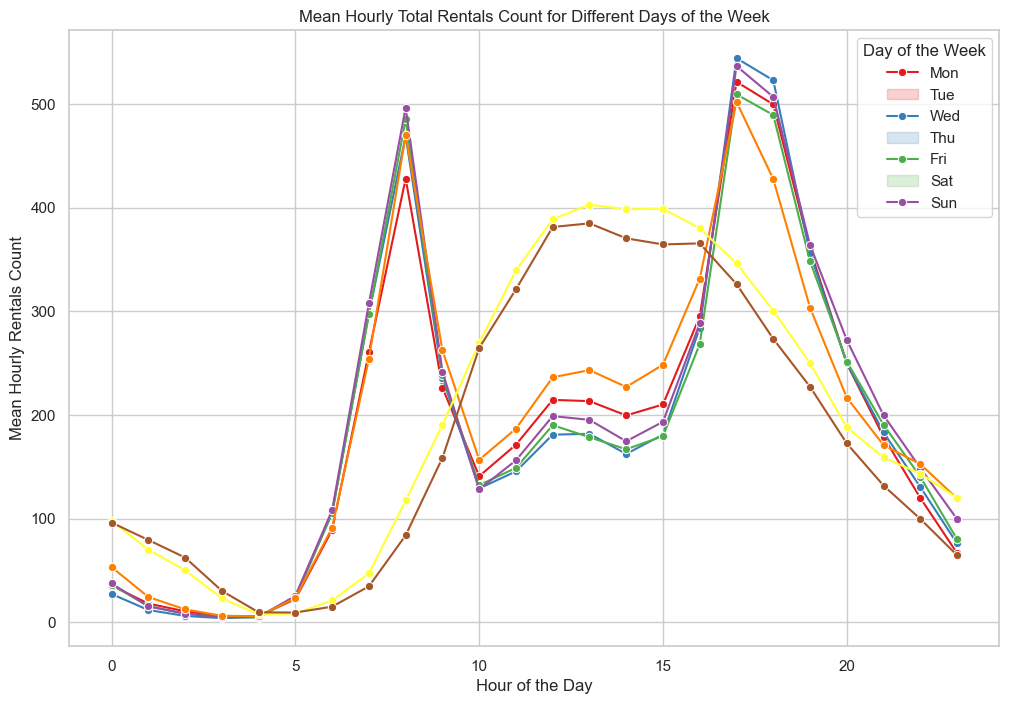

In [25]:
# Set a colorful style for plots
sns.set(style="whitegrid")

# Group by 'day_of_week' and 'hour' and calculate the mean of total rentals 'count'
mean_rentals_by_day_hour = df.groupby(['day_of_week', 'hour'])['count'].mean().reset_index()

# Set up the plot size
plt.figure(figsize=(12, 8))

# Create a lineplot for each day of the week, plotting mean rentals against the hour of the day
sns.lineplot(x='hour', y='count', data=mean_rentals_by_day_hour, hue='day_of_week', marker='o', palette='Set1')

# Customize the plot
plt.title('Mean Hourly Total Rentals Count for Different Days of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Hourly Rentals Count')
plt.legend(title='Day of the Week', labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Display the plot
plt.show()

9. Mean hourly rentals by hour for different seasons in a multi-panel figure

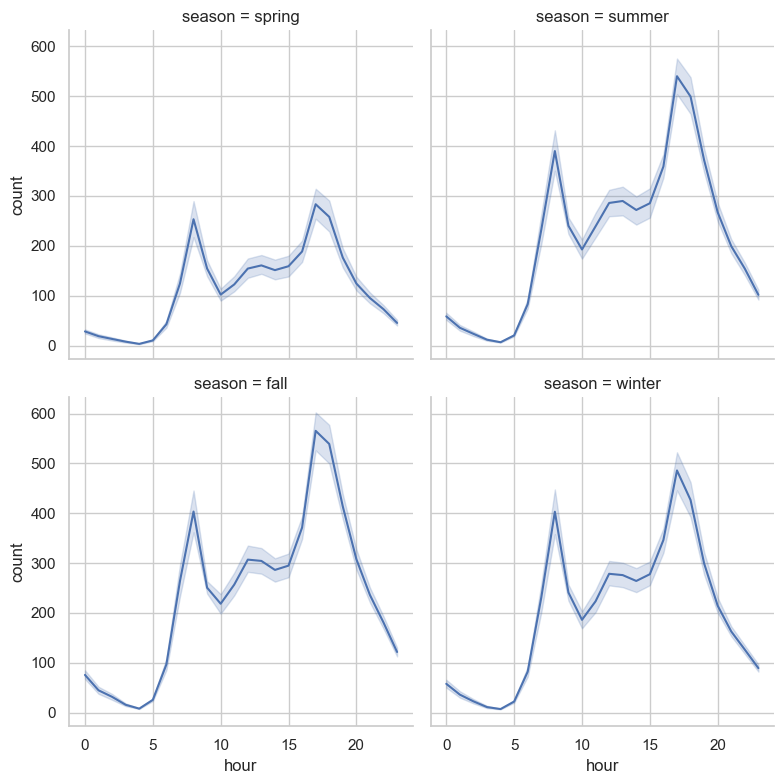

In [26]:
# Check for infinite values and replace them with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Create the FacetGrid plot
g = sns.FacetGrid(df, col="season", col_wrap=2, height=4)

# Map the lineplot to the facet grid
g.map(sns.lineplot, "hour", "count")

# Display the plot
plt.show()

10. Mean and 95% CI of rentals by period of the day and working day

<Axes: title={'center': 'Mean and 95% Confidence Interval of Hourly Total Rentals Count by Period of the Day'}, xlabel='Period of the Day', ylabel='Mean Rental Count'>

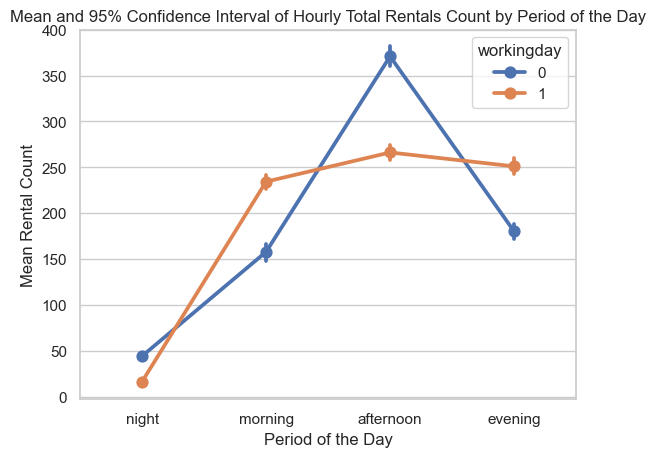

In [27]:
plt.title('Mean and 95% Confidence Interval of Hourly Total Rentals Count by Period of the Day')
plt.xlabel('Period of the Day')
plt.ylabel('Mean Rental Count')
sns.pointplot(x='day_period', y='count', hue='workingday', data=df, ci=95)


11. Correlation heatmap of numerical variables

In [28]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.191832,-0.000354
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,-0.704267,0.002780
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.047692,-0.022740
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,-0.038466,0.145430
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,-0.040235,0.140343
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.026507,-0.278011
windspeed,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,-0.024804,0.146631
casual,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.246959,0.302045
registered,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,-0.084427,0.380540
count,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.166862,-0.002283,0.400601


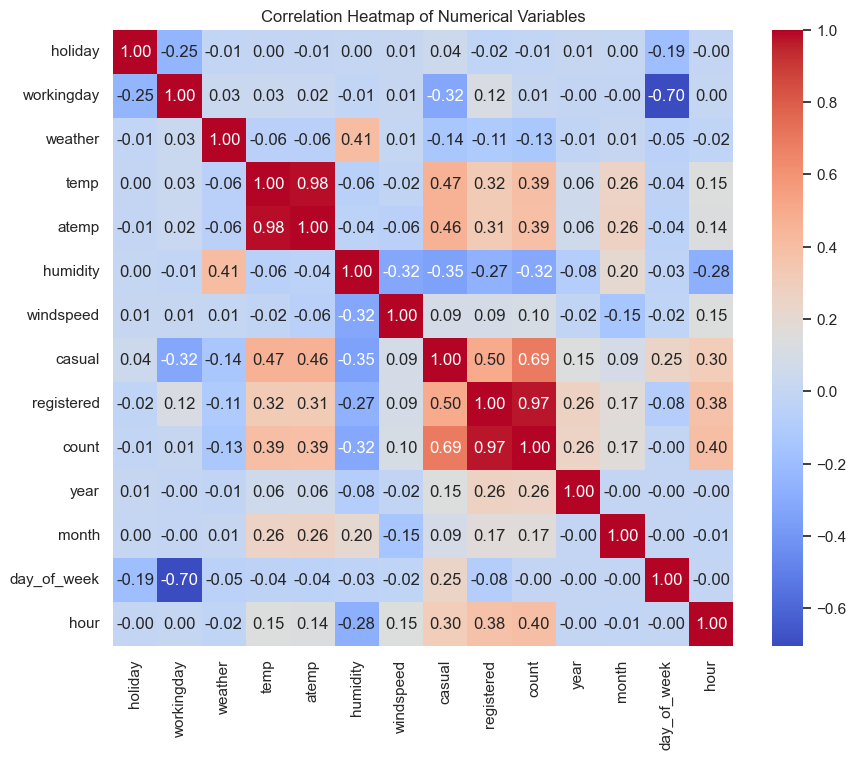

In [29]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()